1. Your task is to apply k-means to the iris dataset and see what happens when you change the value of k. Which solution, if any, do you find most compelling? Does complexity start to become an issue with this data set? Play around a bit and write up your findings and your process to share with your mentor. Keep in mind that it's possible you may find a solution with more than 3 clusters that nevertheless better tracks the real, trinary outcome – two of those clusters may map to a single flower type while the other two map to the other types for example.

In [0]:
#
#1.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets

# Loading the data from Sklearn's datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [0]:

# Defining the k-means
cluster_numbers=[2, 3, 4, 5, 6]
kmeans_clusters=[]

for i in cluster_numbers:
  k_means= KMeans(n_clusters=i, random_state=123)
  kmeans_clusters.append(k_means.fit_predict(X_std))



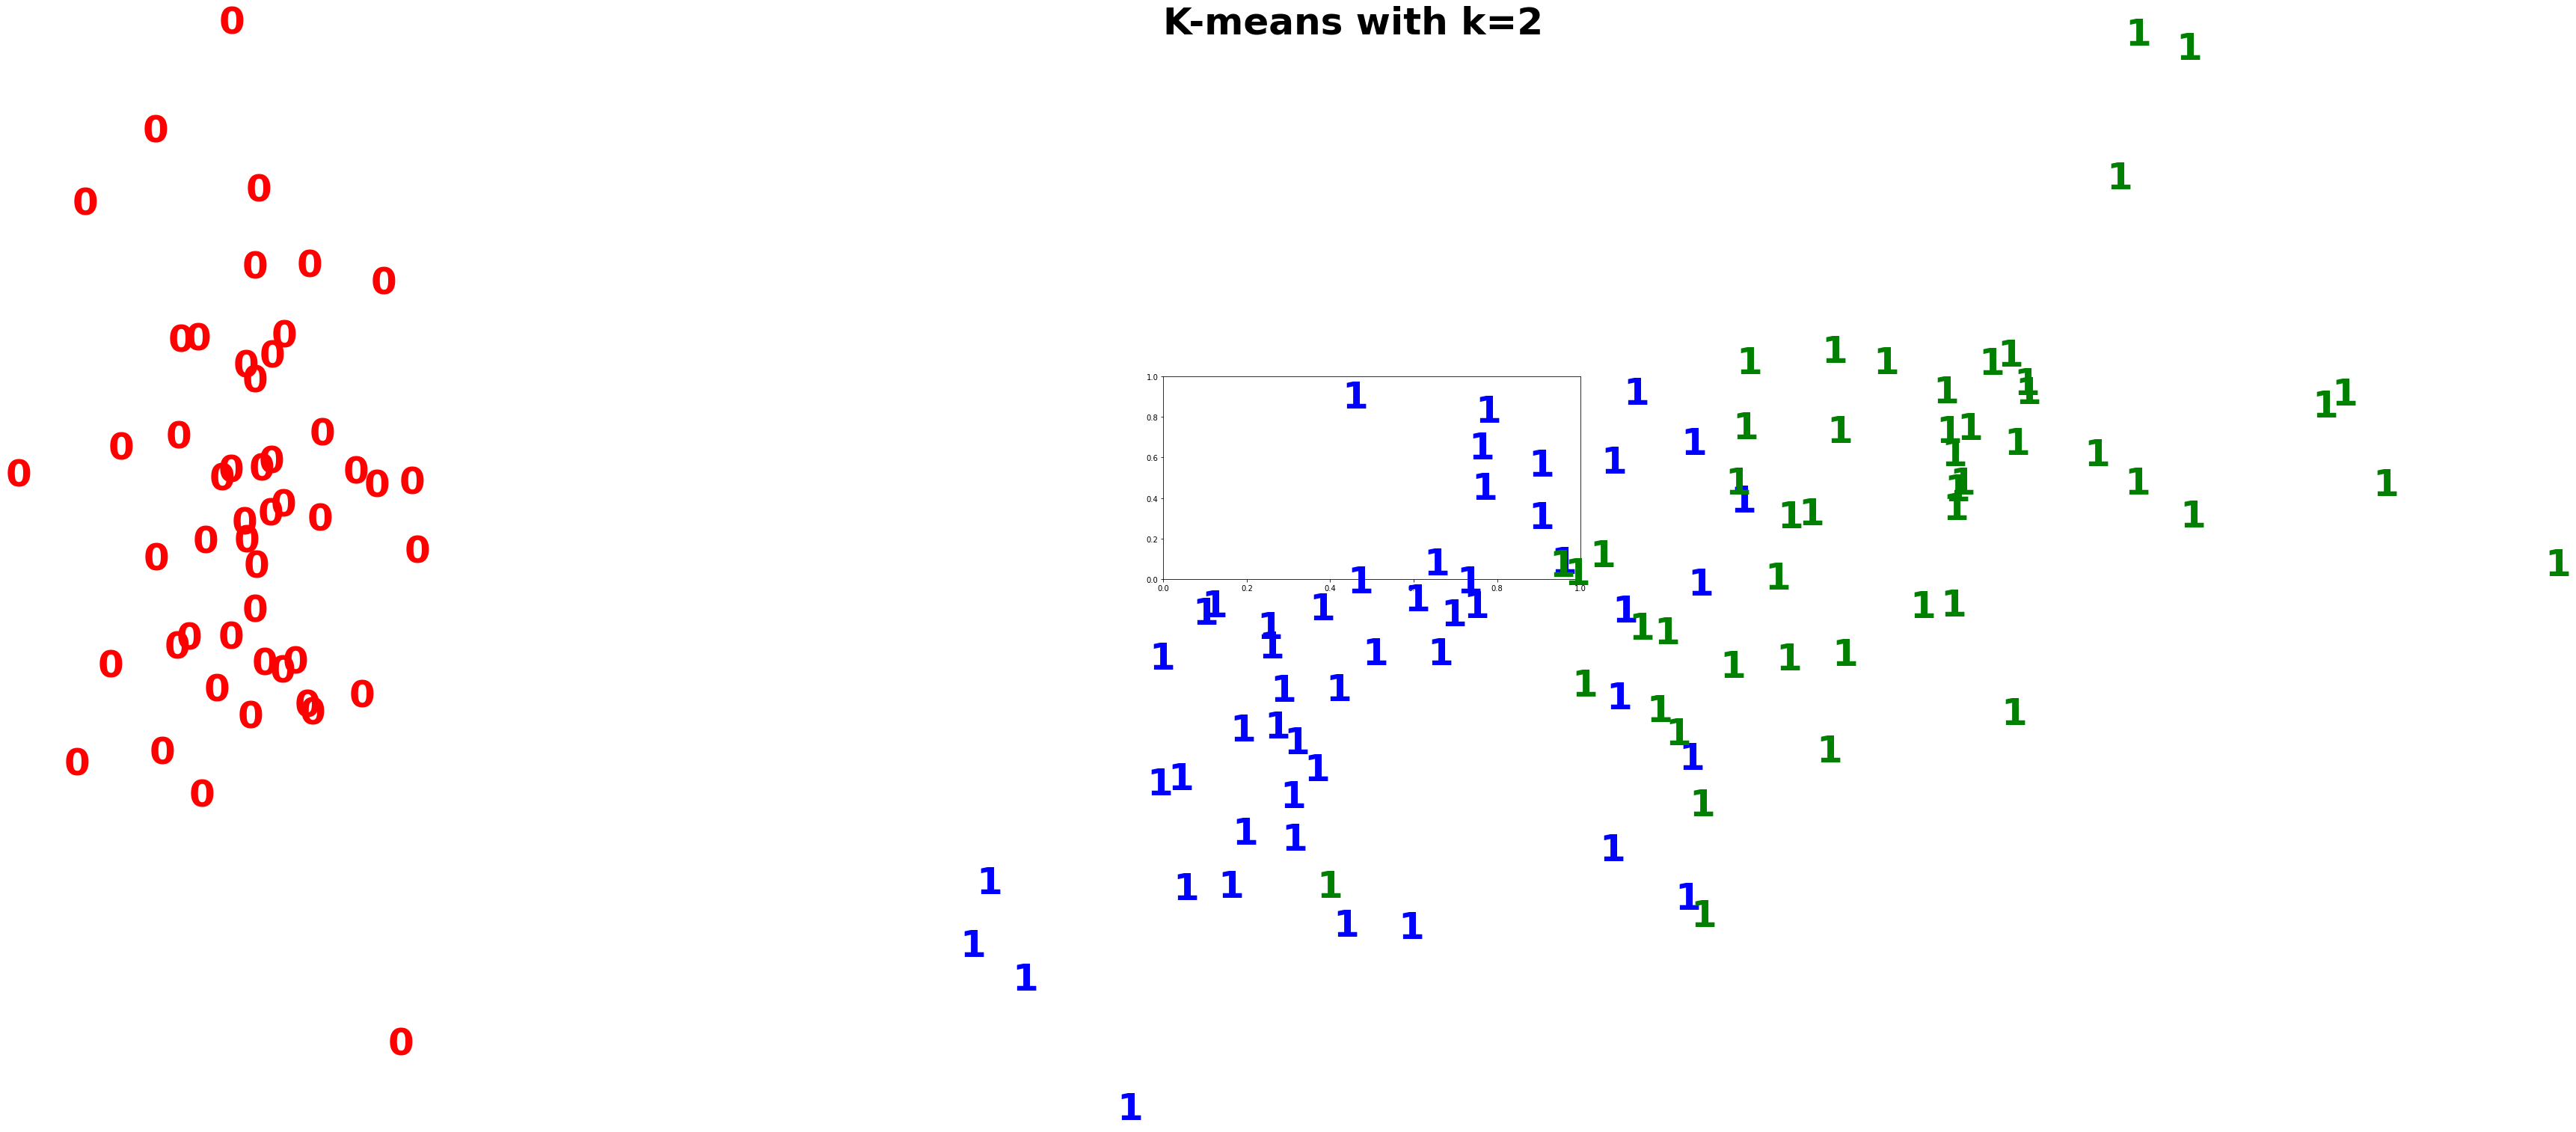

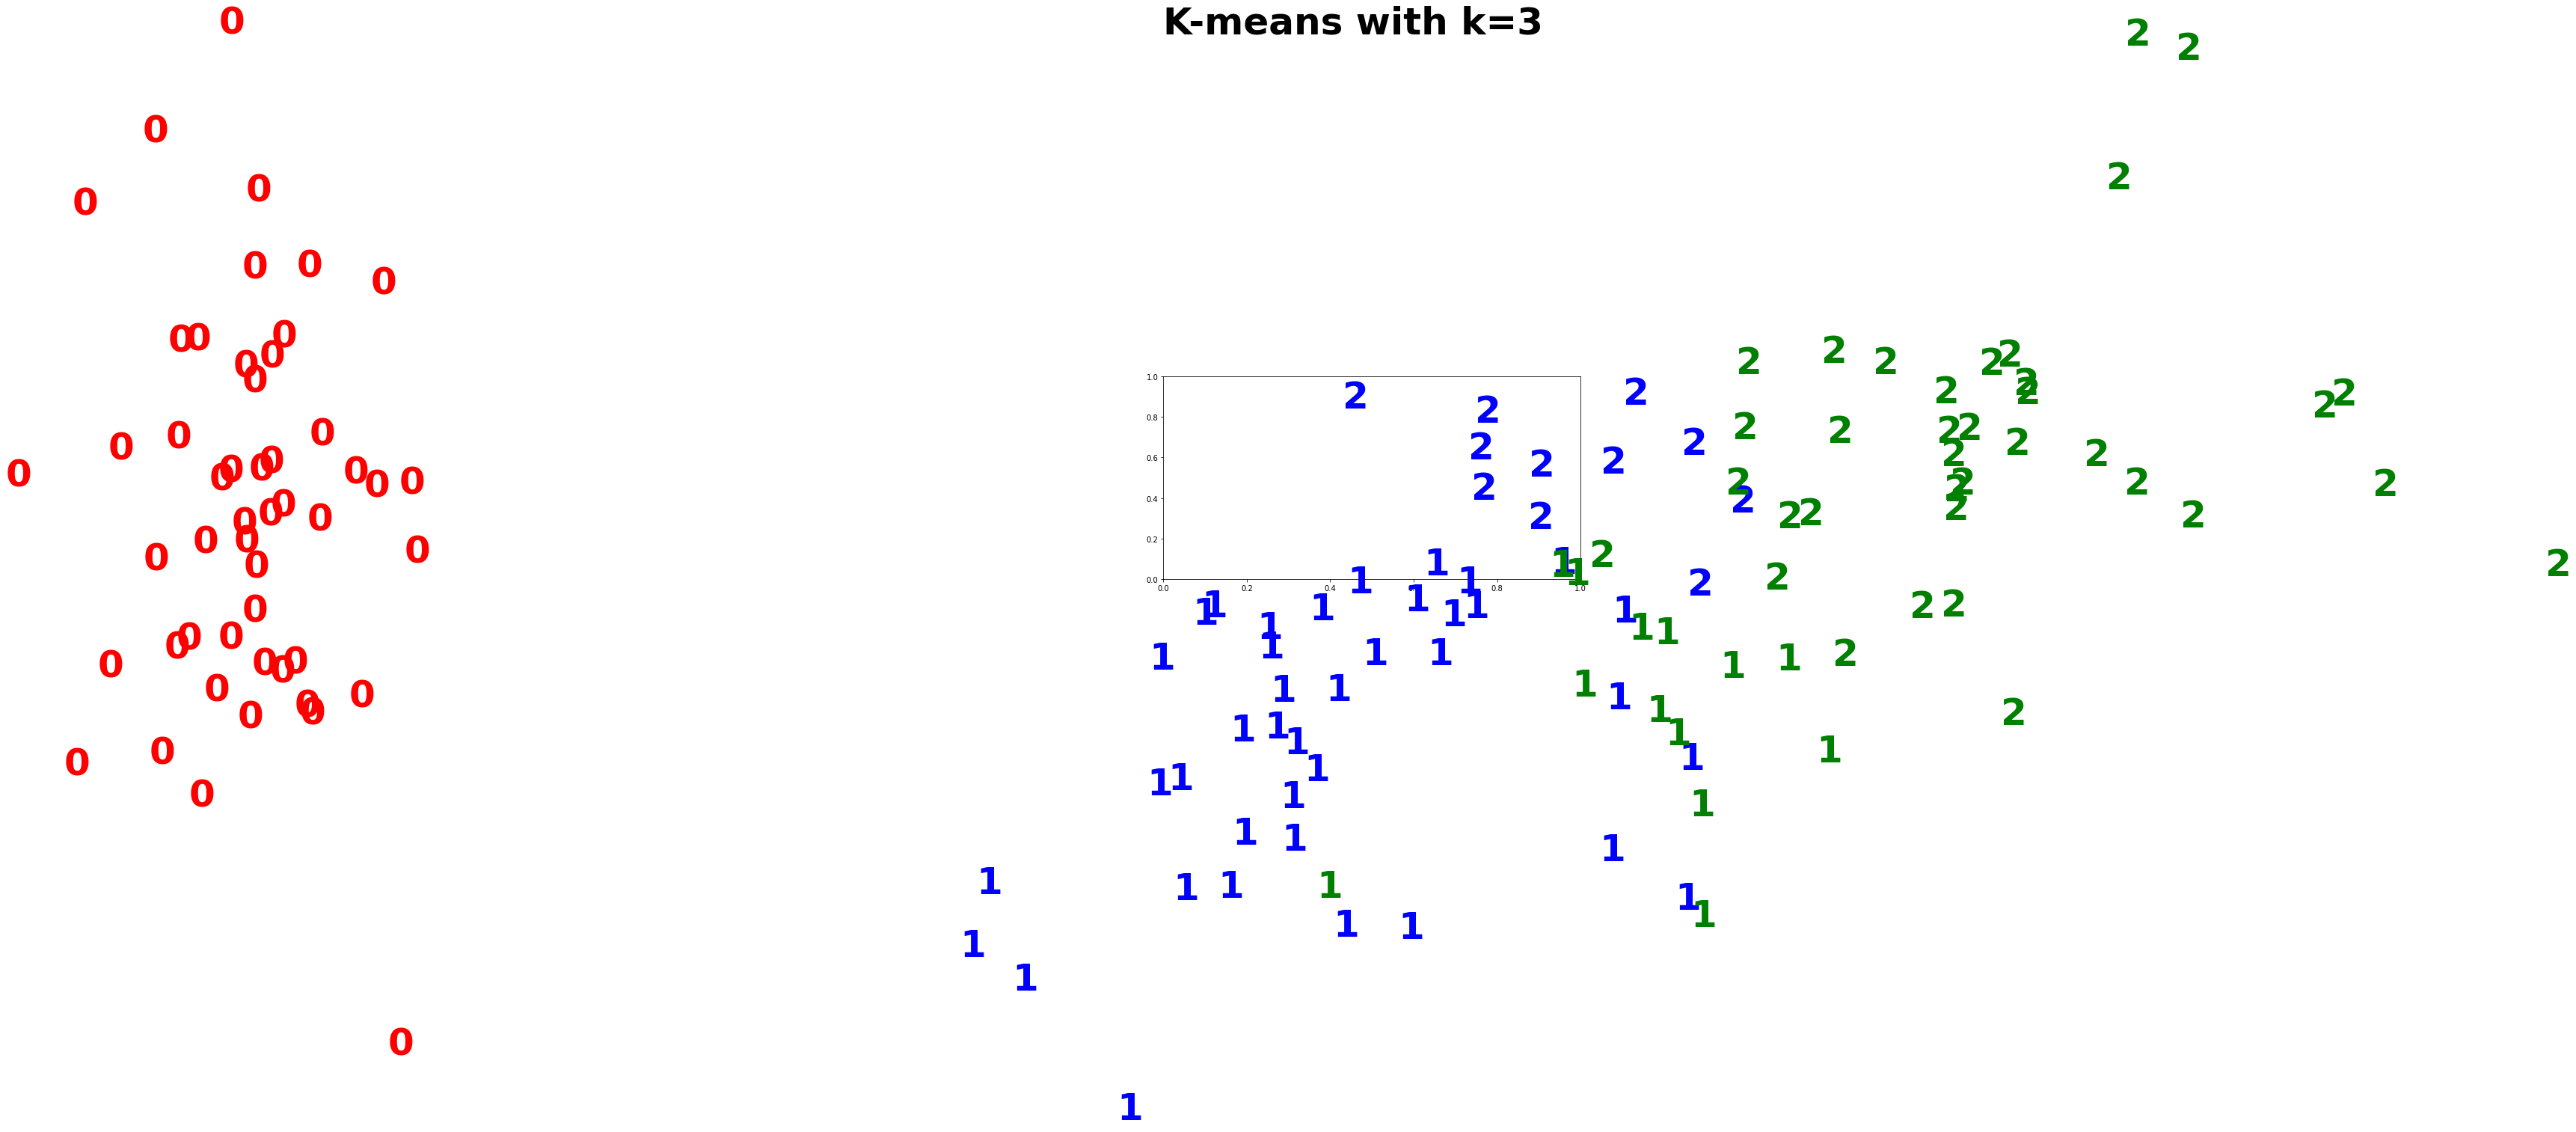

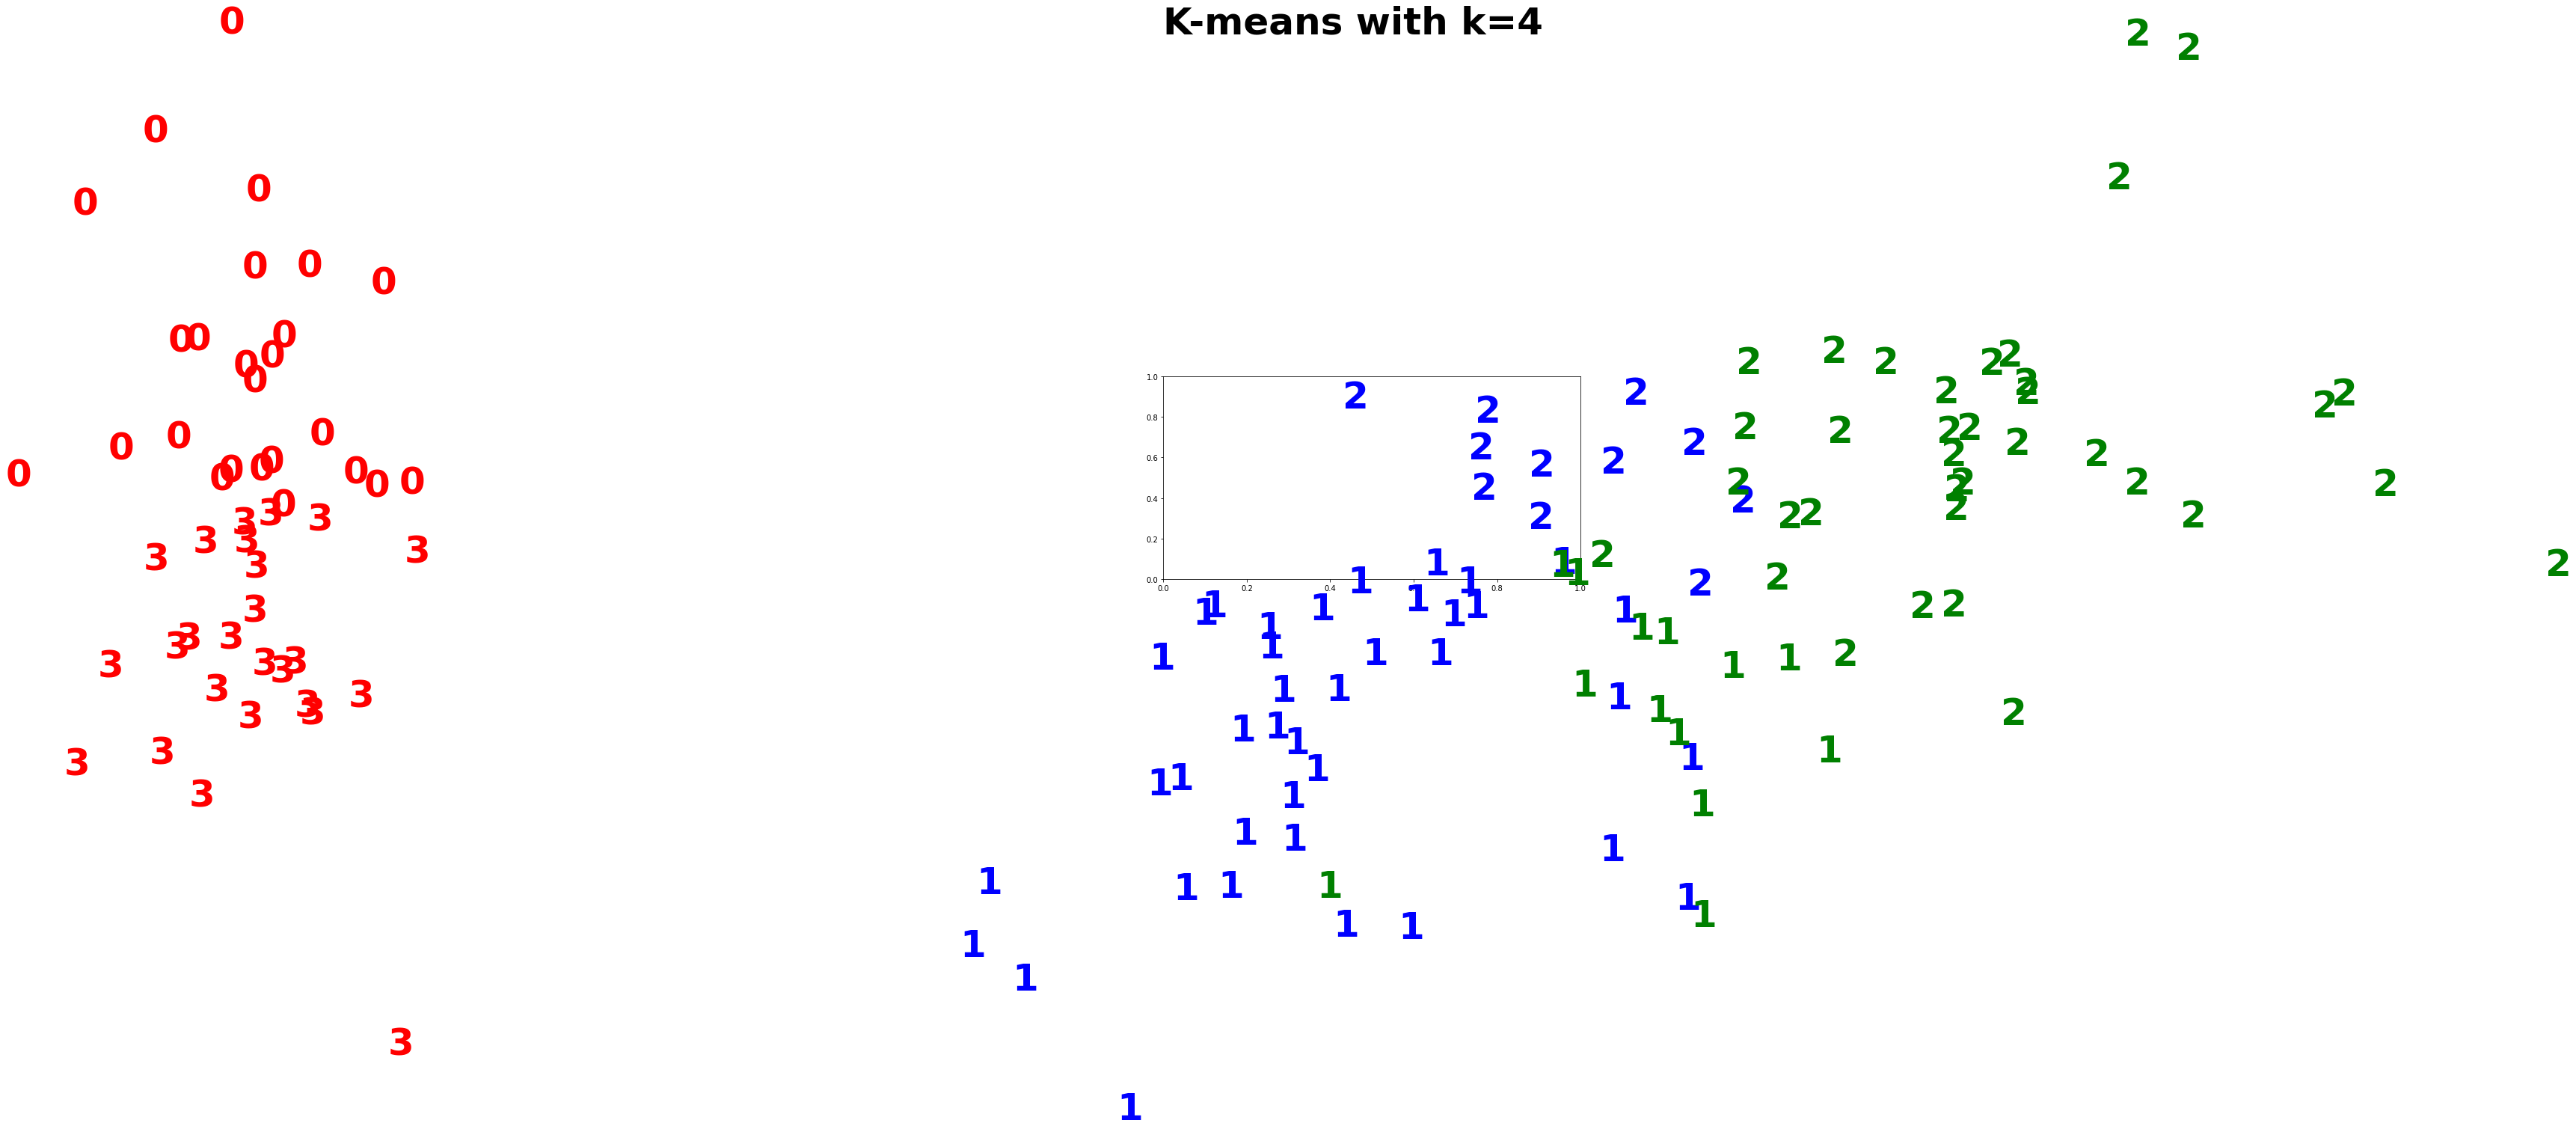

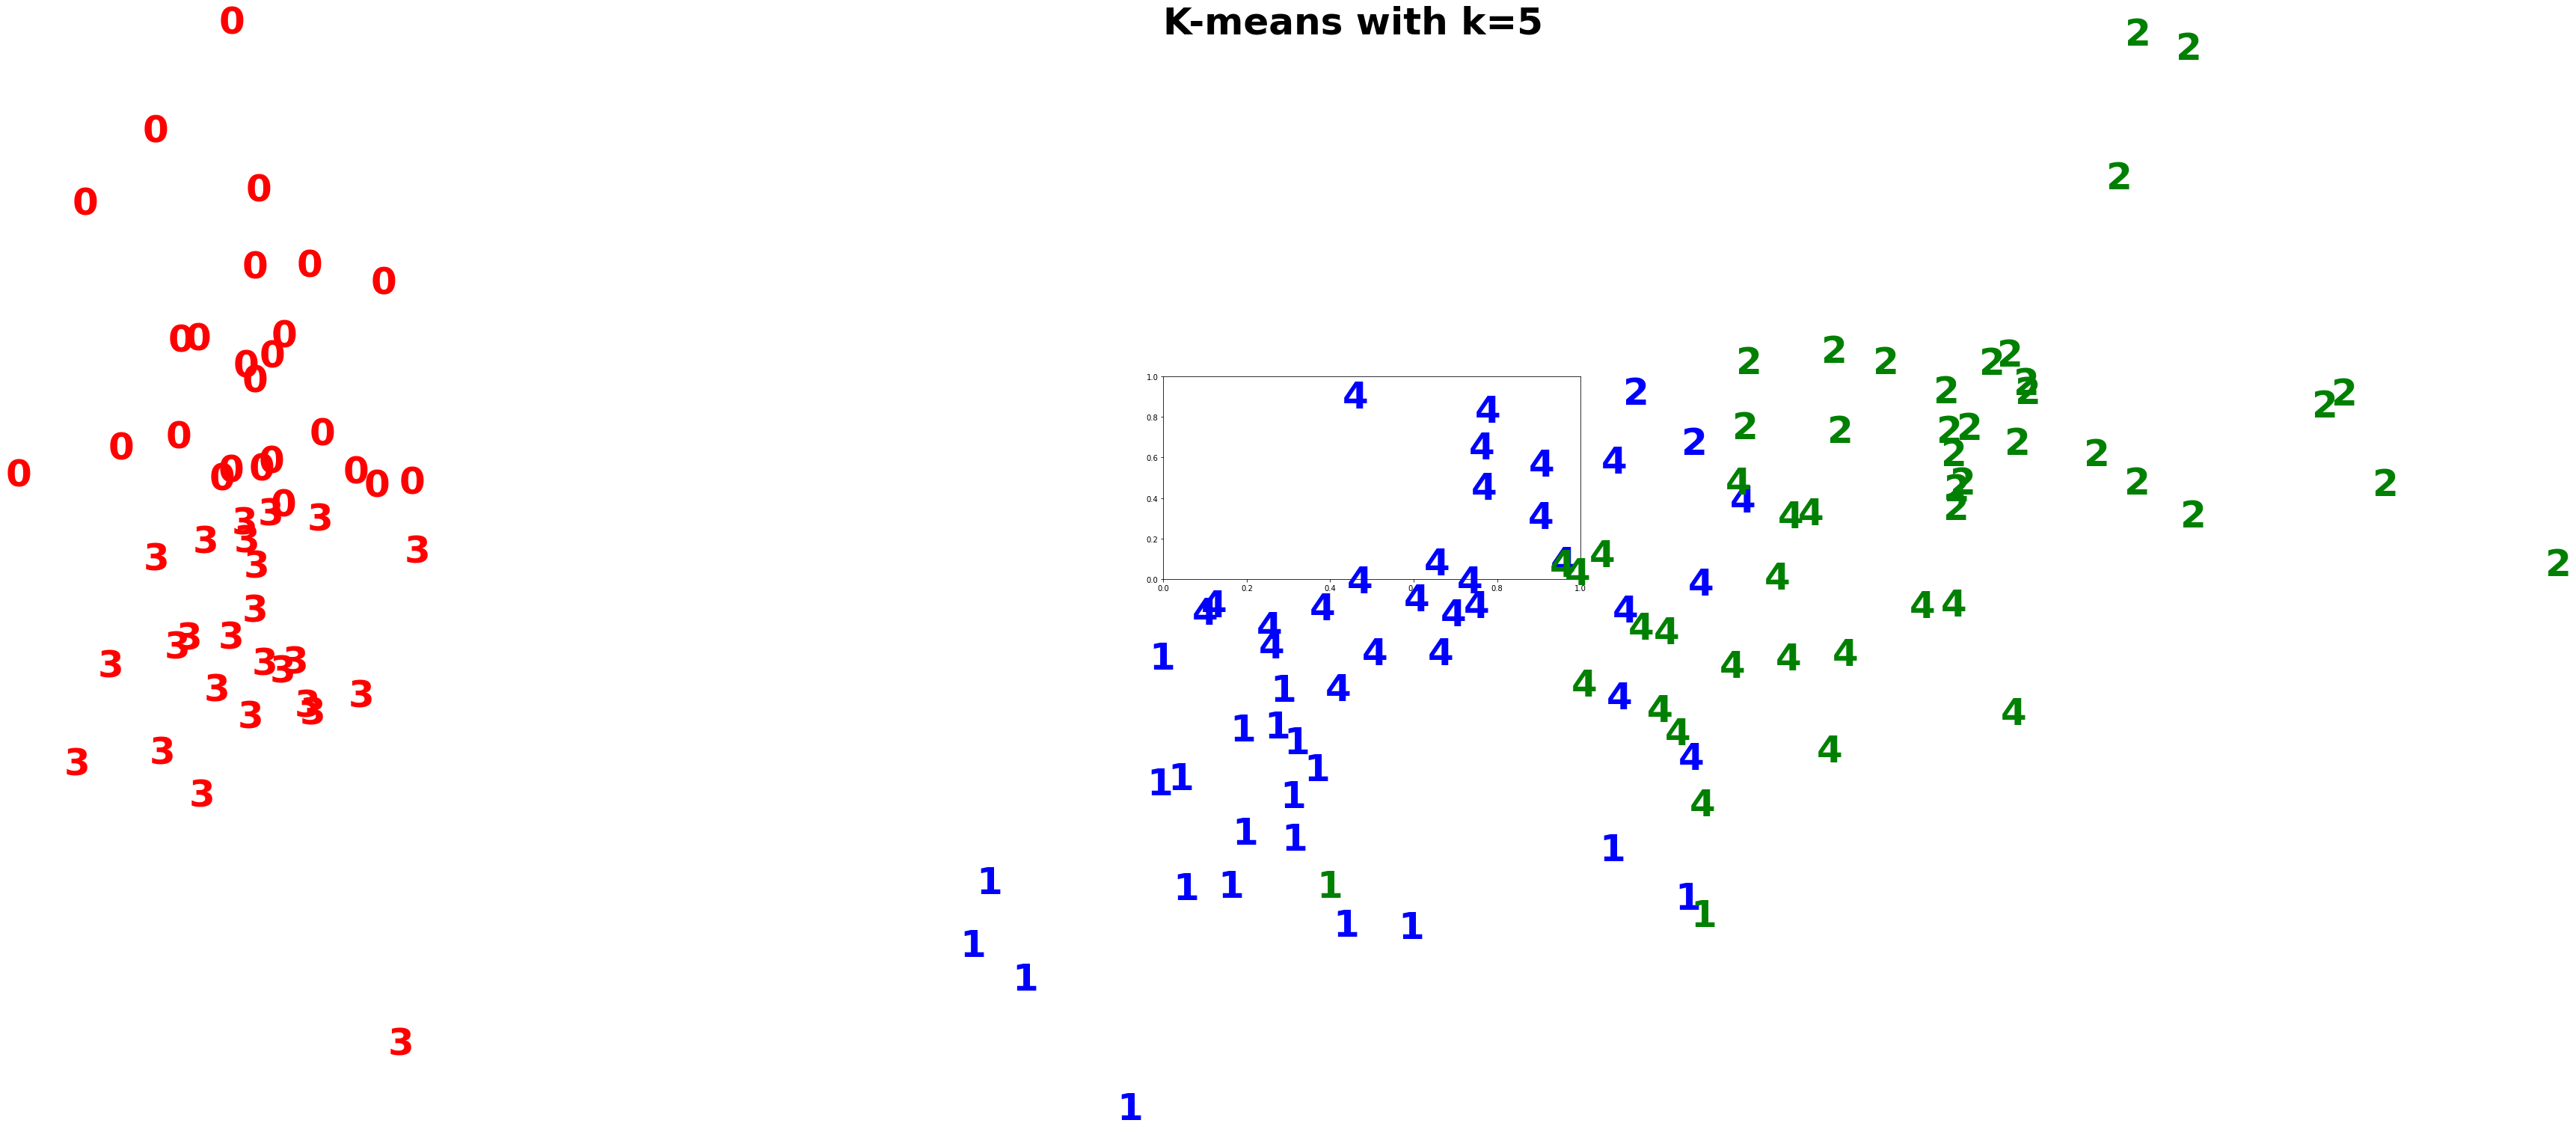

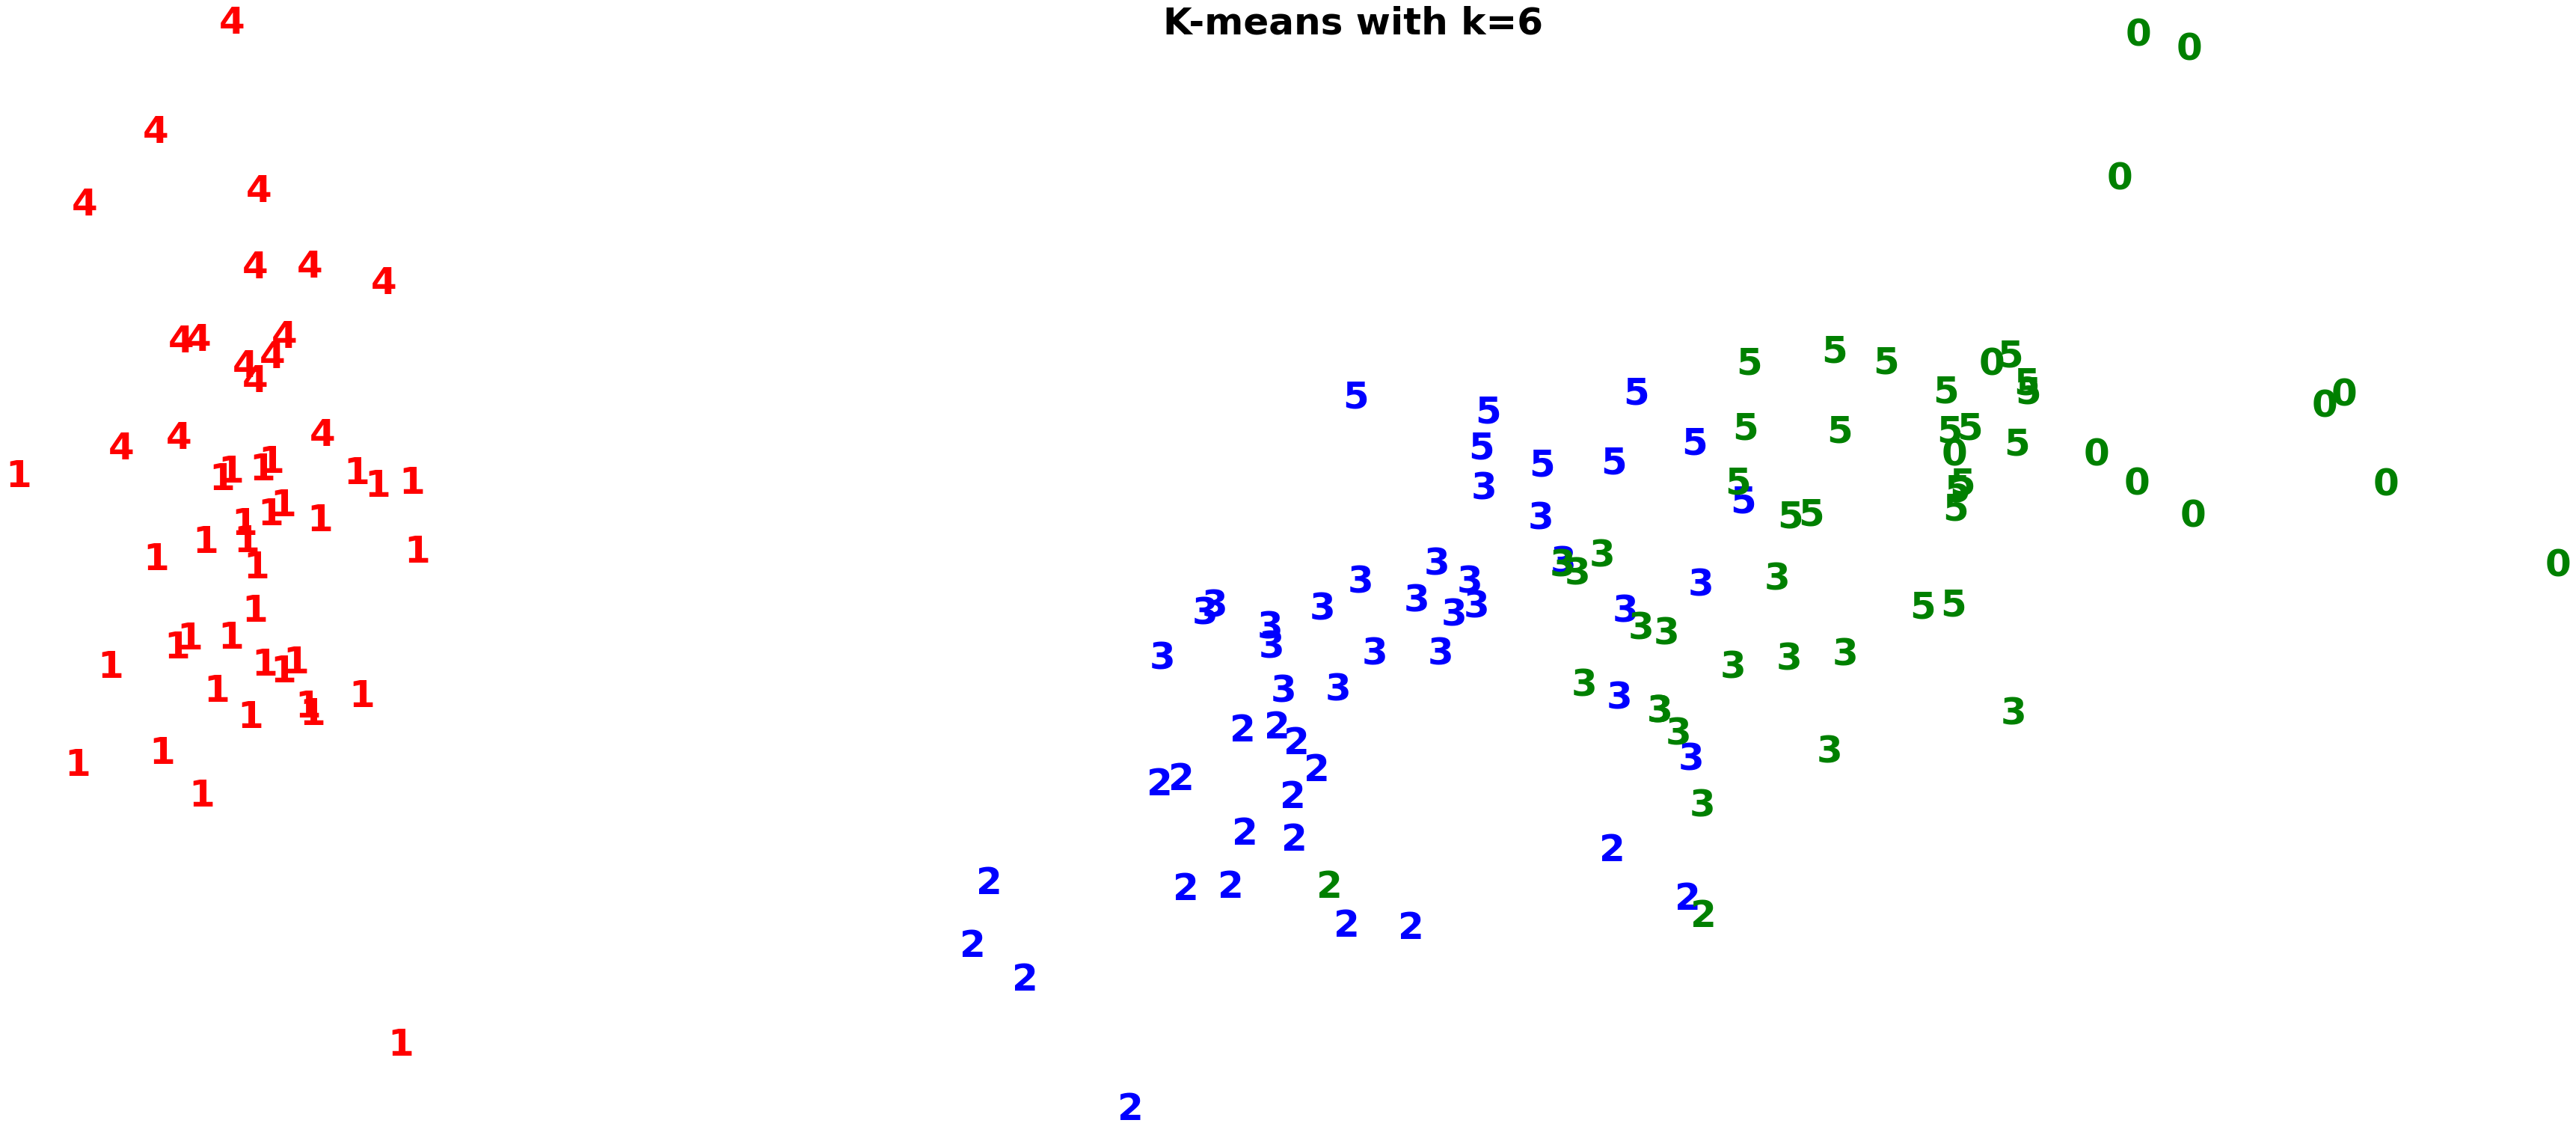

In [3]:
pca = PCA(n_components=2).fit_transform(X_std)

colors='rbg'

for i, solution in enumerate(kmeans_clusters):
  plt.figure(figsize=(10,5))
  plt.text(np.mean(pca[:,0]), np.max(pca[:,1]), "K-means with k={}".format(cluster_numbers[i]),
           fontdict={'weight':'bold','size':50})
  for i in range(pca.shape[0]):
    plt.text(pca[i,0],pca[i,1], str(solution[i]),
             color=colors[y[i]],
             fontdict={'weight':'bold','size':50}
             )


plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [0]:
#when i use k=4,c clearly 

When i use k=4, clearly the complexity of the dataset increases. we already know they are supposed to be 3 clusters.


In [5]:
!pip install sqlalchemy
!pip install psycopg2
!pip install psycopg2-binary

In [0]:

from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')

# Database credentials
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

# use the credentials to start a connection
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

heartdisease_df= pd.read_sql_query('select * from heartdisease', con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [0]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [8]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0


In [0]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [0]:
# Defining the k-means
#kmeans_cluster = KMeans(n_clusters=2, random_state=123)

# Fit model
#%timeit kmeans_cluster.fit(X_std)
#y_pred = kmeans_cluster.predict(X_std)

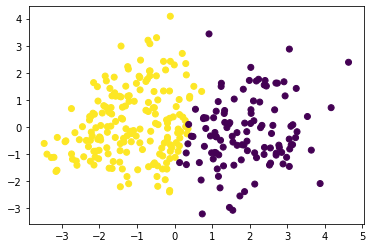

Comparing k-means clusters against the data:
col_0    0    1
row_0          
0      101   13
1       38  151


In [13]:
from sklearn.cluster import KMeans, MiniBatchKMeans
#use pca to reduce dimensionality
X_pca = PCA(2).fit_transform(X_std)

# calculate the predicted values
y_pred = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)


plt.scatter(X_pca[:,0], X_pca[:,1], c=y_pred)
plt.show()

#comparing the solution with the data
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

In [0]:
# I think the prediction is pretty good except for a few cases where the target was not correctly 
#clustered.